# Data Science: Primeiros passos

## Dados e visualizações

> Conhecendo nossos dados e o Pandas

In [3]:
import pandas as pd

notas = pd.read_csv('/content/drive/MyDrive/Cursos/Alura/Data Science/Primeiros passos/ml/ratings.csv')

#mostrar os 5 primeiros elementos
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#Verificar os formatos da tabela
notas.shape

(100836, 4)

In [5]:
#trocando os nomes das colunas
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#Verificando todos os valores de nota
#(Serie)
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [7]:
#Verificando todos os valores únicos de nota
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Note que a Serie <font color="green">nota</font> vai de 1 - 5

In [10]:
#Contando os valores de nota
#Perceba que é retornado do que mais aparece para a menor opção
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [11]:
#Verificando a média
notas['nota'].mean()

3.501556983616962

> Visualizando dados com histograma e boxplot

In [13]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

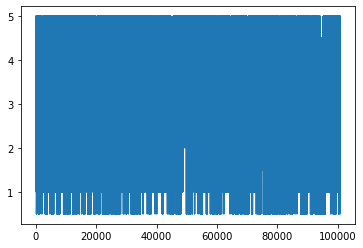

In [12]:
notas.nota.plot()

 O gráfico plot não foi eficiente para esse tipo de análise. Será necessário fazer plot com o tipo <font color="orange">histograma</font>

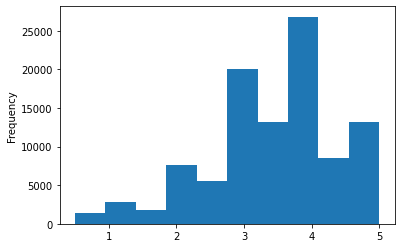

In [14]:
notas.nota.plot(kind='hist')

Identificando a mediana

In [21]:
print(f"Média: {notas['nota'].mean()}")
print(f"Mediana: {notas['nota'].median()}")

Média: 3.501556983616962
Mediana: 3.5


In [23]:
#Verificar diversas medidas para entender os dados
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


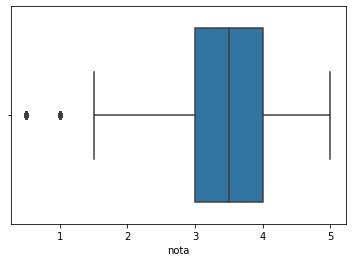

In [24]:
import seaborn as sns

sns.boxplot(notas.nota)

O boxplot é, resumidamente, a forma visual da função <font color="red">describe()</font>